In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
transactions = transactions.dropna(subset=['CustomerID'])

In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
trans_cust = transactions.merge(customers, on='CustomerID', how='left')

trans_cust_prod = trans_cust.merge(products, on='ProductID', how='left')

print(trans_cust_prod.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

<ipython-input-7-660cecbf2bdc>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = trans_cust_prod['TransactionID'].resample('M').count()


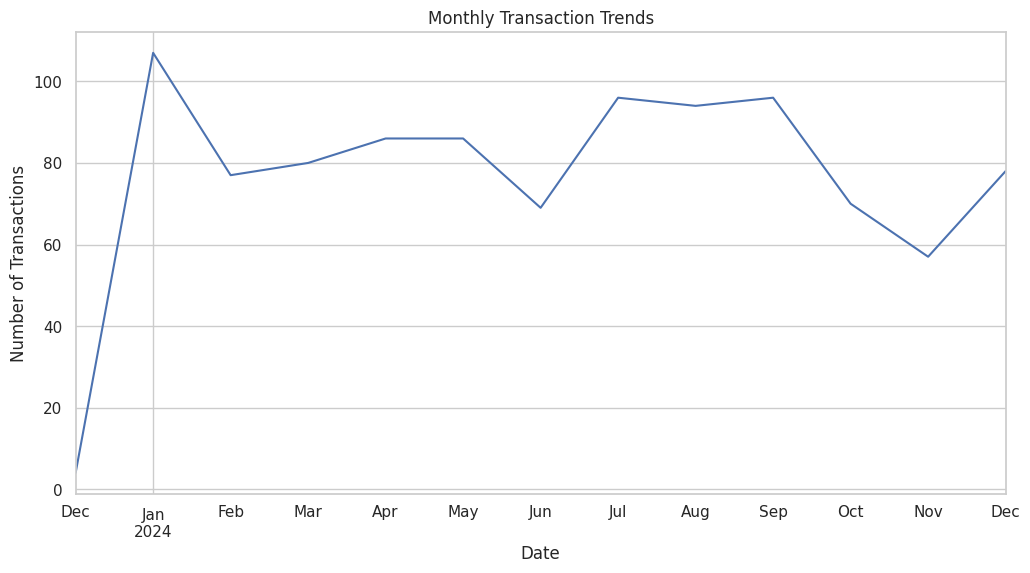

In [7]:
trans_cust_prod.set_index('TransactionDate', inplace=True)

monthly_transactions = trans_cust_prod['TransactionID'].resample('M').count()

plt.figure(figsize=(12,6))
monthly_transactions.plot()
plt.title('Monthly Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

<ipython-input-8-860ce29c3a56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_region.index, y=revenue_region.values, palette='viridis')


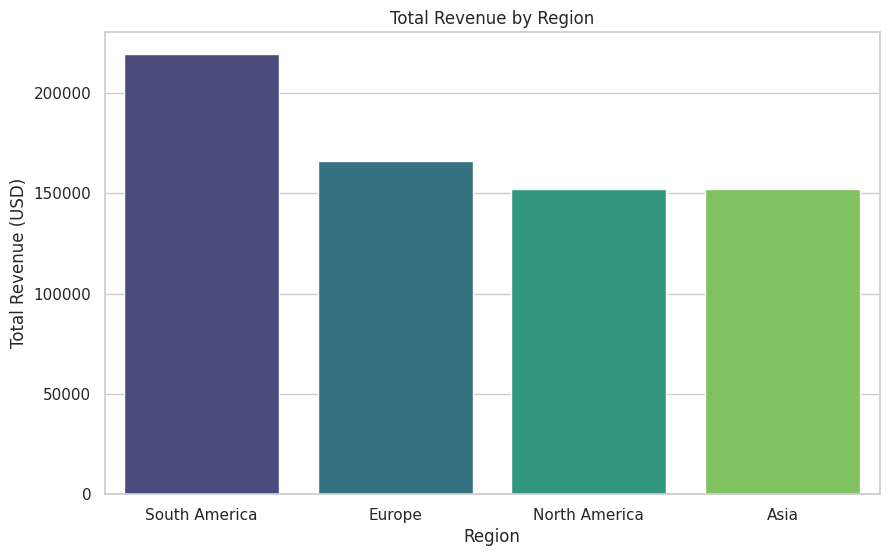

In [8]:
revenue_region = trans_cust_prod.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_region.index, y=revenue_region.values, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

<ipython-input-9-a58a91eef705>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


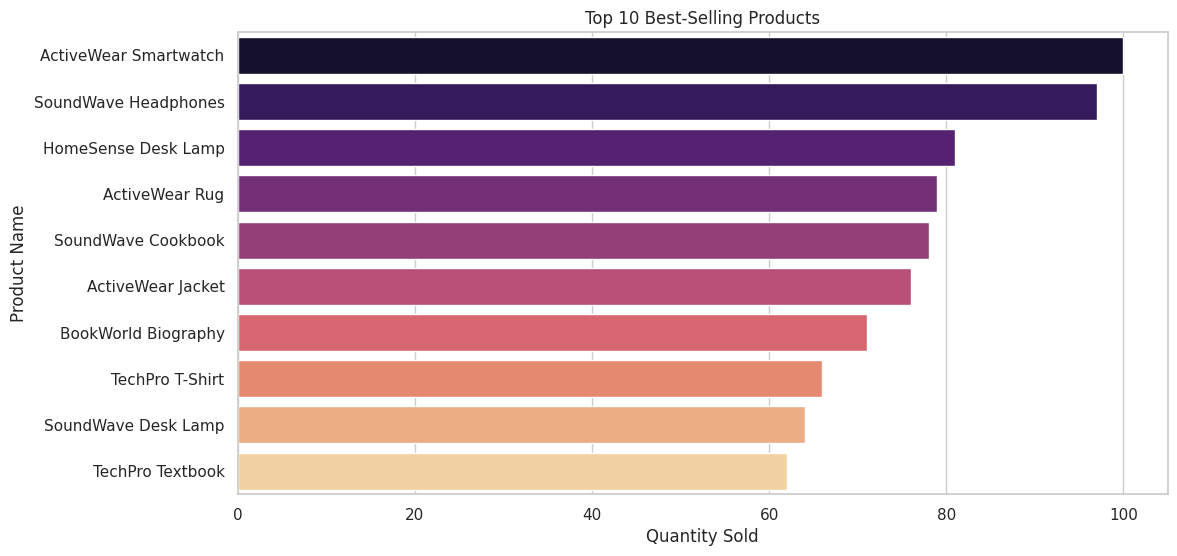

In [9]:
# Calculating total quantity sold per product
top_products = trans_cust_prod.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

<ipython-input-10-e3d23fda8fa8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_signups = customers.set_index('SignupDate').resample('M').size()


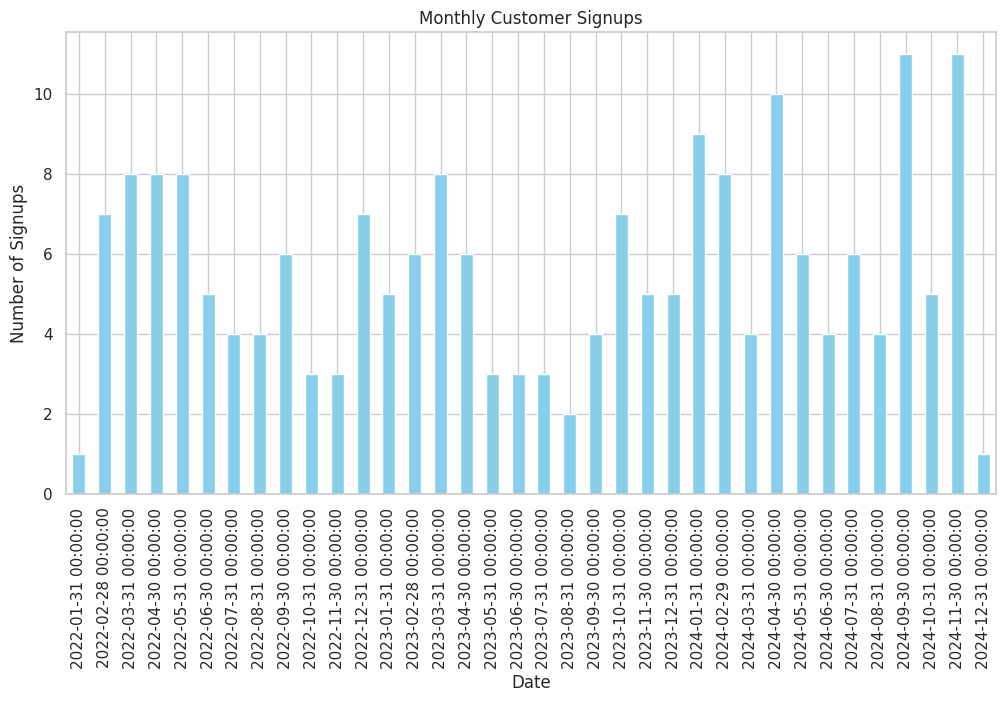

In [10]:
# Resample signups monthly
monthly_signups = customers.set_index('SignupDate').resample('M').size()

plt.figure(figsize=(12,6))
monthly_signups.plot(kind='bar', color='skyblue')
plt.title('Monthly Customer Signups')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

<ipython-input-11-2222f666f860>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products, palette='Set2')


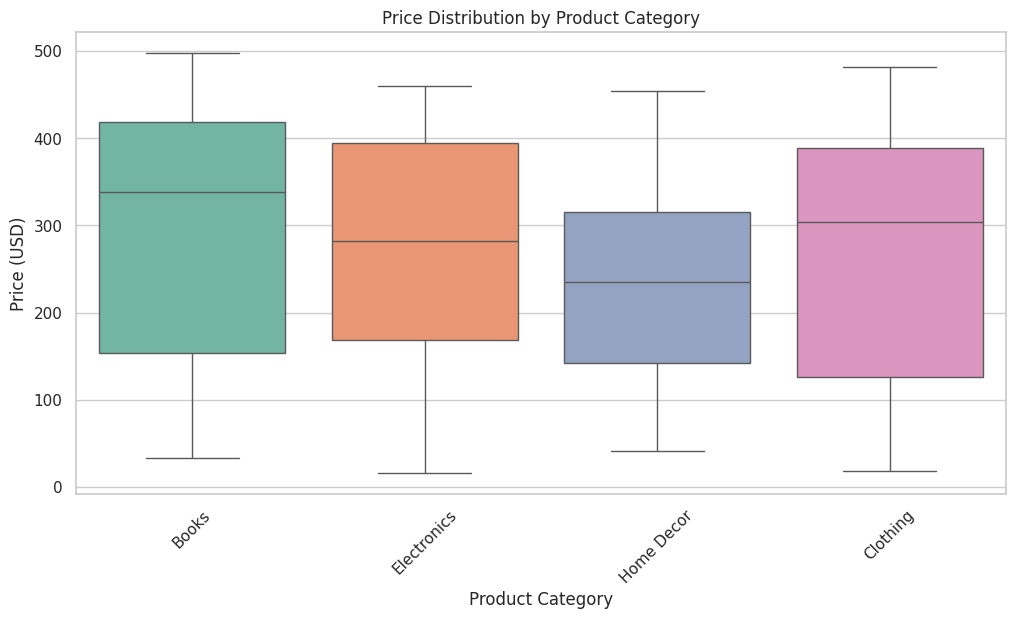

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Price', data=products, palette='Set2')
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()